In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import scipy as sp 
import scipy.stats
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [2]:
retail_df = pd.read_csv('Dataset/Online Retail Data Set.csv', encoding="ISO-8859-1", dtype= {'CustomerID': 'Int64'})
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom


In [3]:
retail_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0


In [4]:
retail_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       Int64
Country         object
dtype: object

In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  Int64  
 7   Country      541909 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 33.6+ MB


In [6]:
retail_df.shape

(541909, 8)

In [7]:
retail_df['Description'] = retail_df['Description'].str.replace('.','').str.upper().str.strip()
retail_df['Description'] = retail_df['Description'].replace('\s+',' ',regex = True)
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype(str).str.upper()
retail_df['StockCode'] = retail_df['StockCode'].str.upper()
retail_df['Country'] = retail_df['Country'].str.upper()


In [8]:
retail_df.shape

(541909, 8)

In [9]:
def dataframe_summary(dataframe):
    """
    Generates a summary DataFrame containing information about null values, number of unique values,
    and duplicated rows for each column in the input DataFrame.

    Parameters:
    dataframe (pandas DataFrame): The DataFrame to be summarized.

    Returns:
    pandas DataFrame: A summary DataFrame containing information about null values, number of unique values,
    and duplicated rows for each column in the input DataFrame.
    """

    null_counts = dataframe.isnull().sum()
    unique_counts = dataframe.nunique()
    duplicated_counts = dataframe.duplicated().sum()

    summary_df = pd.DataFrame({
        'Null Values': null_counts,
        'Unique Values': unique_counts,
        'Duplicated Rows': duplicated_counts
    })

    return summary_df

dataframe_summary(retail_df)

,Null Values,Unique Values,Duplicated Rows
InvoiceNo,0,25900,5268
StockCode,0,3958,5268
Description,1454,4183,5268
Quantity,0,722,5268
InvoiceDate,0,23260,5268
UnitPrice,0,1630,5268
CustomerID,135080,4372,5268
Country,0,38,5268


In [10]:
def duplicated_rows(dataframe):
    """
    Finds duplicated rows in the input DataFrame and returns a DataFrame containing them.

    Parameters:
    dataframe (pandas DataFrame): The DataFrame to search for duplicated rows.

    Returns:
    pandas DataFrame: A DataFrame containing duplicated rows from the input DataFrame.
    """

    duplicated_rows = dataframe[dataframe.duplicated()]
    return duplicated_rows

duplicated_rows(retail_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908,UNITED KINGDOM
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908,UNITED KINGDOM
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908,UNITED KINGDOM
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908,UNITED KINGDOM
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,09-12-2011 11:34,0.39,14446,UNITED KINGDOM
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,09-12-2011 11:34,2.49,14446,UNITED KINGDOM
541692,581538,22992,REVOLVER WOODEN RULER,1,09-12-2011 11:34,1.95,14446,UNITED KINGDOM
541699,581538,22694,WICKER STAR,1,09-12-2011 11:34,2.10,14446,UNITED KINGDOM


In [11]:
duplicated_rows = retail_df[retail_df.duplicated()]

In [12]:
retail_df = retail_df.drop(retail_df[retail_df.index.isin(duplicated_rows.index)].index)

In [13]:
retail_df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'LOST',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [14]:
def null_rows(dataframe, column_name):
    """
    Finds rows in the input DataFrame where the specified column contains null values and returns a DataFrame containing them.

    Parameters:
    dataframe (pandas DataFrame): The DataFrame to search for null values in the specified column.
    column_name (str): The name of the column to check for null values.

    Returns:
    pandas DataFrame: A DataFrame containing rows from the input DataFrame where the specified column contains null values.
    """

    null_rows = dataframe[dataframe[column_name].isnull()]
    return null_rows

null_rows(retail_df, 'Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,<NA>,UNITED KINGDOM
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,<NA>,UNITED KINGDOM
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,<NA>,UNITED KINGDOM
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,<NA>,UNITED KINGDOM
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,<NA>,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,07-12-2011 18:26,0.0,<NA>,UNITED KINGDOM
535326,581203,23406,NaN,15,07-12-2011 18:31,0.0,<NA>,UNITED KINGDOM
535332,581209,21620,NaN,6,07-12-2011 18:35,0.0,<NA>,UNITED KINGDOM
536981,581234,72817,NaN,27,08-12-2011 10:33,0.0,<NA>,UNITED KINGDOM


In [15]:
print(f"Minimum value in column Quantity: {retail_df['Quantity'].min()}")
print(f"Maximum value in column Quantity: {retail_df['Quantity'].max()}")

Minimum value in column Quantity: -80995
Maximum value in column Quantity: 80995


In [16]:
def datetime_conversion(dataframe, column_name, date_format):
    """
    Converts a column containing date and time strings to datetime format within the same DataFrame.

    Parameters:
    dataframe (pandas DataFrame): The DataFrame containing the column to be converted.
    column_name (str): The name of the column to be converted to datetime format.
    date_format (str): The format of the datetime strings in the column.

    Returns:
    None
    """

    dataframe[column_name] = pd.to_datetime(dataframe[column_name], format=date_format)
    
datetime_conversion(retail_df, 'InvoiceDate', '%d-%m-%Y %H:%M')

In [17]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  Int64         
 7   Country      536641 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 37.4+ MB


In [18]:
stock_len5_to_6 = retail_df.query('5 < StockCode.str.len() < 7').sort_values(by='StockCode')

In [19]:
stock_len4 = retail_df.query('StockCode.str.len() < 5').sort_values(by='StockCode')

In [20]:
stock_len5 = retail_df.query('StockCode.str.len() == 5').sort_values(by='StockCode')

In [21]:
stock_lenm6 = retail_df.query('StockCode.str.len() > 7').sort_values(by='StockCode')

In [22]:
final = retail_df.query('4 < StockCode.str.len() < 7').sort_values(by='StockCode')

In [23]:
retail_df = retail_df.drop(retail_df[~retail_df.index.isin(final.index)].index)

In [24]:
retail_df.shape

(533262, 8)

In [25]:
zero_price_rows = retail_df[retail_df['UnitPrice'] == 0.00]

In [26]:
retail_df = retail_df.drop(retail_df[retail_df.index.isin(zero_price_rows.index)].index)

In [27]:
invoice_details = retail_df.query('InvoiceNo.str.len() == 6').sort_values(by='InvoiceNo')

In [28]:
print(f"Minimum value in column Quantity: {retail_df['Quantity'].min()}")
print(f"Maximum value in column Quantity: {retail_df['Quantity'].max()}")

Minimum value in column Quantity: -80995
Maximum value in column Quantity: 80995


In [29]:
print(f"Minimum value in column UnitPrice: {retail_df['UnitPrice'].min()}")
print(f"Maximum value in column UnitPrice: {retail_df['UnitPrice'].max()}")

Minimum value in column UnitPrice: 0.03
Maximum value in column UnitPrice: 649.5


In [30]:
def map_price_range(df):
    price_ranges = [(0, 2), (2, 5), (5, 10), (10, 20), (20, 50), (50, 150), (150, 300), (300, 700)]
    labels = ['Very Cheap', 'Cheap', 'Moderate', 'Expensive', 'More Expensive', 'High', 'Very High', 'Luxury']

    df['PriceRange'] = pd.cut(df['UnitPrice'], bins=[low for low, high in price_ranges] + [max(high for low, high in price_ranges)], labels=labels)
    return df

retail_df = map_price_range(retail_df)

In [31]:
retail_df['Date'] = retail_df['InvoiceDate'].dt.day
retail_df['Month'] = retail_df['InvoiceDate'].dt.month
retail_df['Year'] = retail_df['InvoiceDate'].dt.year

retail_df = retail_df.drop(columns=['InvoiceDate'])

In [32]:
def create_return_product_column(df):
    df['return_product'] = df['Quantity'].apply(lambda x: 1 if x < 0 else 0)
    return df

retail_df = create_return_product_column(retail_df)

In [33]:
retail_df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [34]:
def map_month_to_quarter(month):
    if month in [1, 2, 3]:
        return 'Quarter1'
    elif month in [4, 5, 6]:
        return 'Quarter2'
    elif month in [7, 8, 9]:
        return 'Quarter3'
    elif month in [10, 11, 12]:
        return 'Quarter4'

retail_df['Quarters'] = retail_df['Month'].apply(map_month_to_quarter)

In [35]:
retail_df['Cost'] = retail_df['UnitPrice'] * retail_df['Quantity']

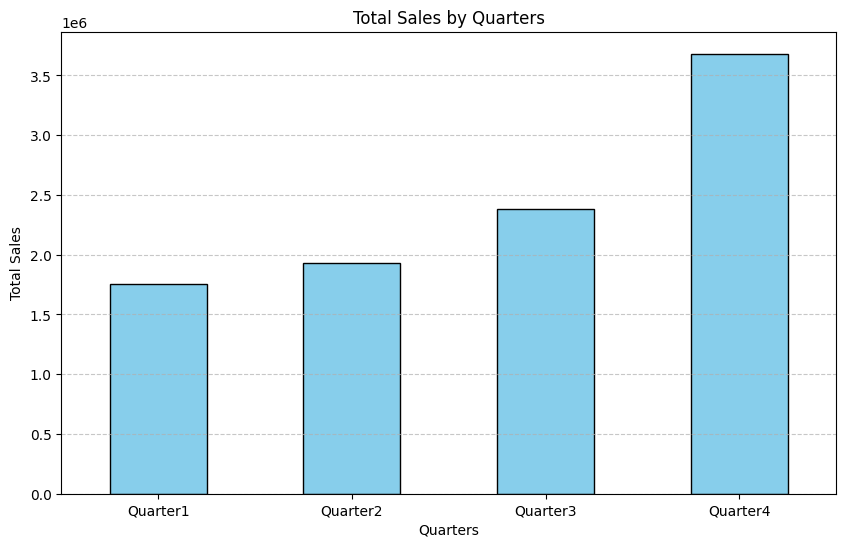

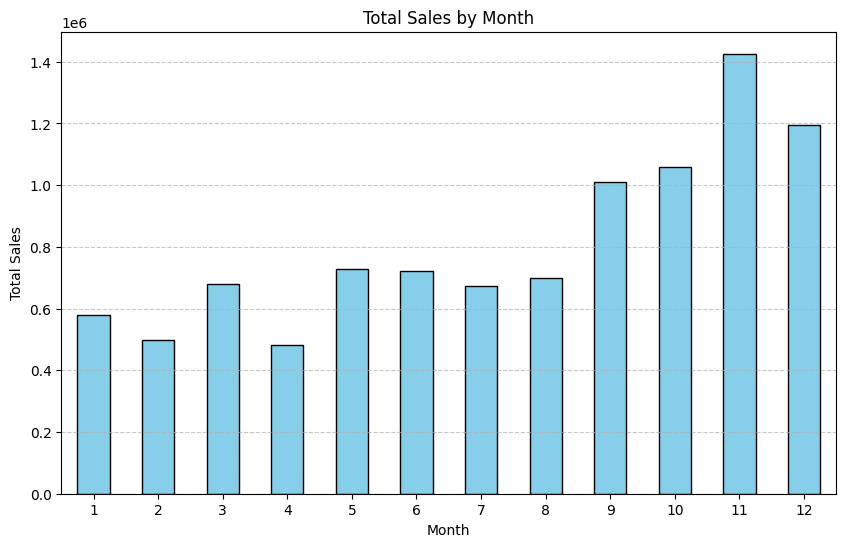

In [36]:
def plot_total_sales(data, column):

    total_sales = data.groupby(column)['Cost'].sum()

    plt.figure(figsize=(10, 6))
    total_sales.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Total Sales')
    plt.title(f'Total Sales by {column}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_total_sales(retail_df, 'Quarters')

plot_total_sales(retail_df, 'Month')

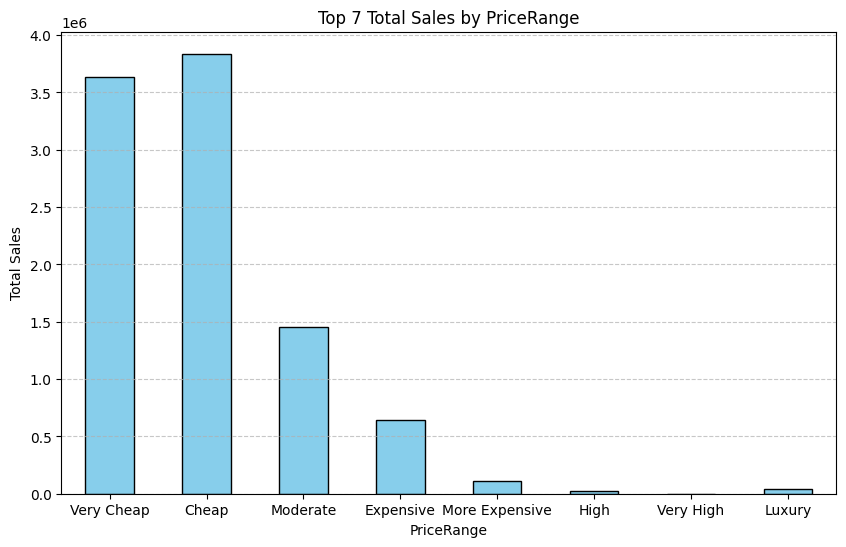

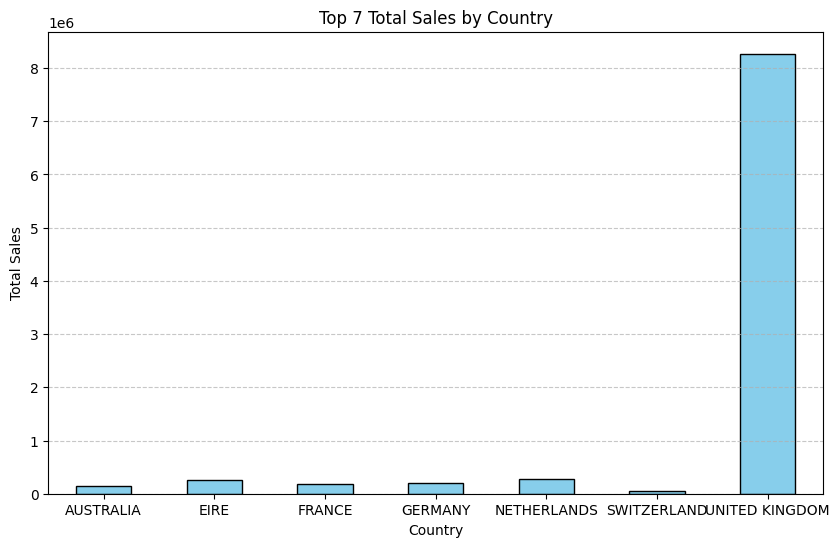

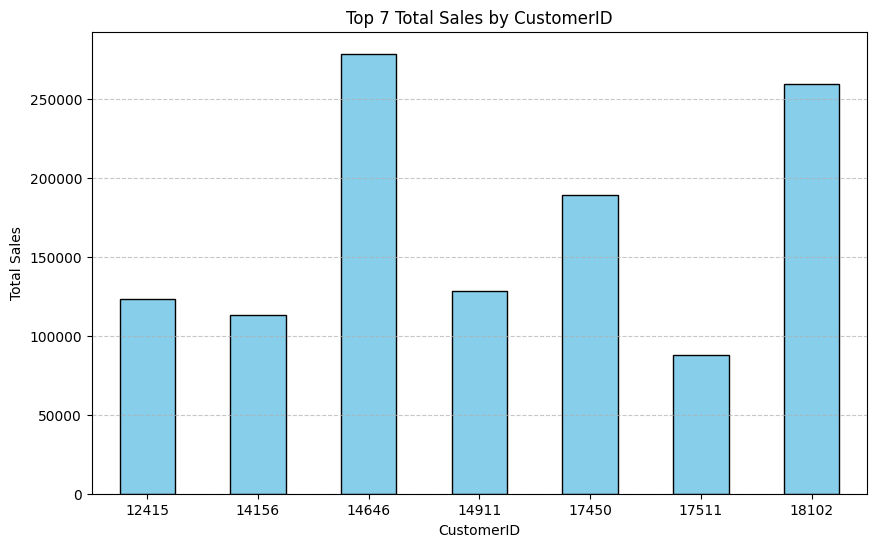

In [37]:
def plot_top_sales(data, column, top_n=7):
    total_sales = data.groupby(column)['Cost'].sum().reset_index()
    
    total_sales = total_sales.sort_values(by='Cost', ascending=False)
    
    top_groups = total_sales.head(top_n)[column].tolist()
    
    data = data[data[column].isin(top_groups)]
    
    top_total_sales = data.groupby(column)['Cost'].sum()
    
    plt.figure(figsize=(10, 6))
    top_total_sales.plot(kind='bar', color='skyblue', edgecolor='black')
    
    plt.xlabel(column)
    plt.ylabel('Total Sales')
    plt.title(f'Top {top_n} Total Sales by {column}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_top_sales(retail_df, 'PriceRange')
plot_top_sales(retail_df, 'Country')
plot_top_sales(retail_df, 'CustomerID')

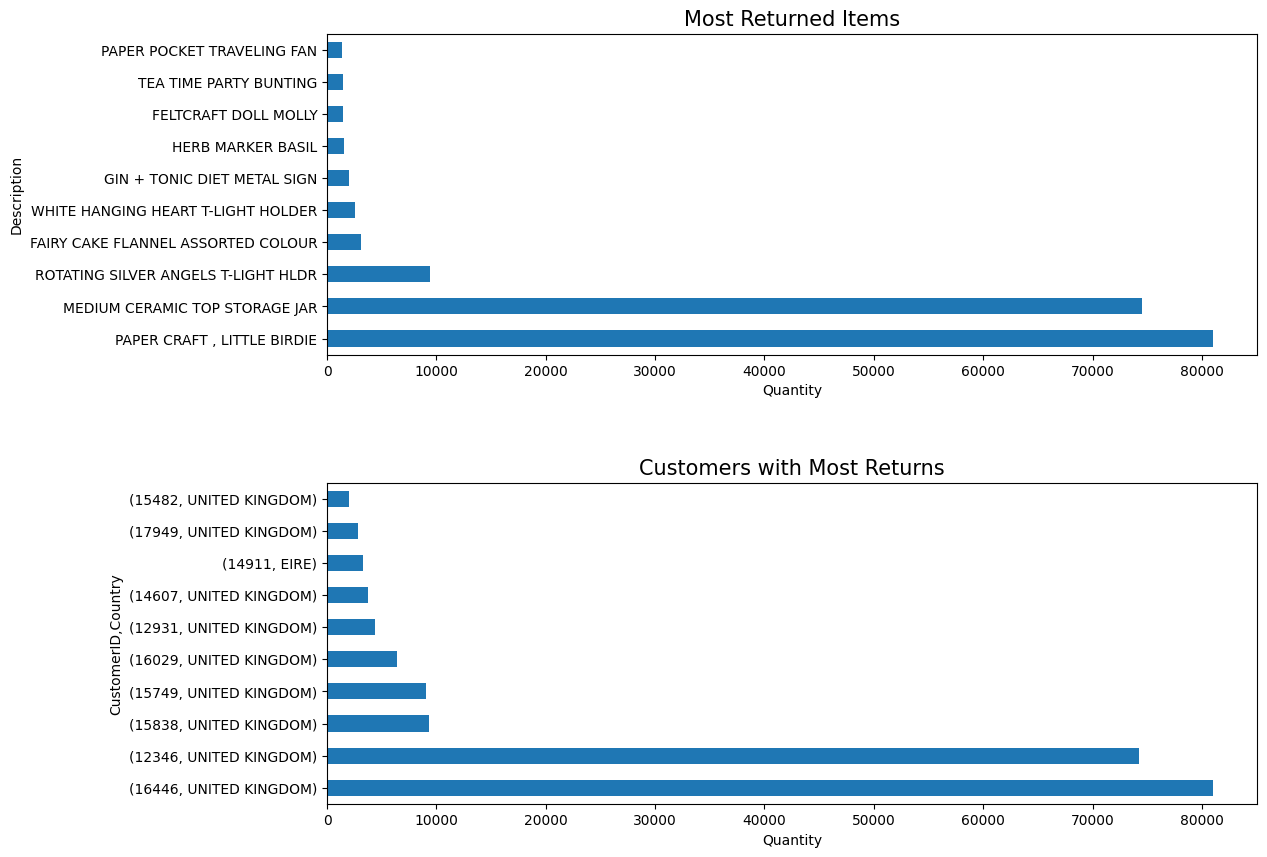

In [38]:
returned_items = retail_df[retail_df.Quantity < 0].groupby('Description')['Quantity'].sum().abs().nlargest(10)

return_customers = retail_df[retail_df.Quantity < 0].groupby(['CustomerID', 'Country'])['Quantity'].sum().abs().nlargest(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

returned_items.plot(kind='barh', ax=ax1).set_title('Most Returned Items', fontsize=15)
return_customers.plot(kind='barh', ax=ax2).set_title('Customers with Most Returns', fontsize=15)

ax1.set_xlabel('Quantity')
ax2.set_xlabel('Quantity')

plt.subplots_adjust(hspace=0.4)
plt.show()

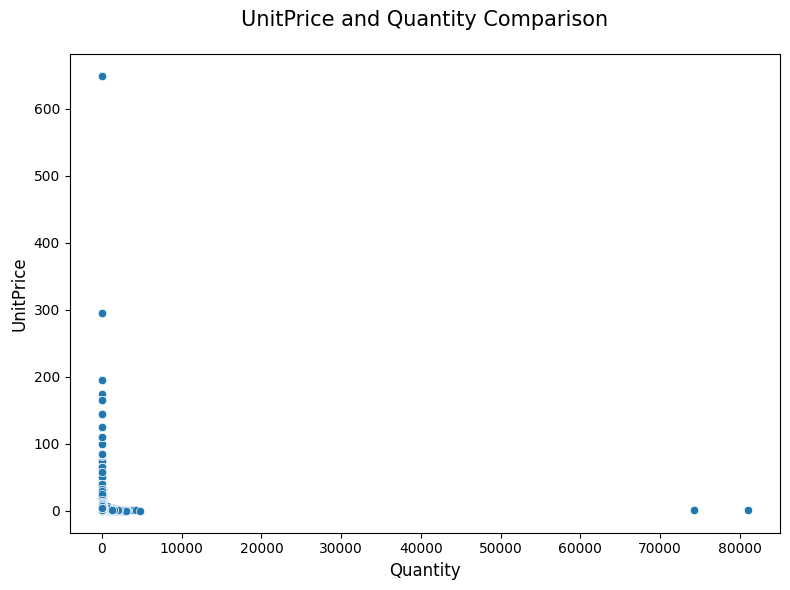

In [39]:
filtered_df = retail_df[retail_df['Cost'] > 0]

fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(x="Quantity", y="UnitPrice", data=filtered_df, ax=ax)

ax.set_xlabel("Quantity", fontsize=12)
ax.set_ylabel("UnitPrice", fontsize=12)

ax.set_title("UnitPrice and Quantity Comparison", fontsize=15, pad=20)

plt.tight_layout()
plt.show()

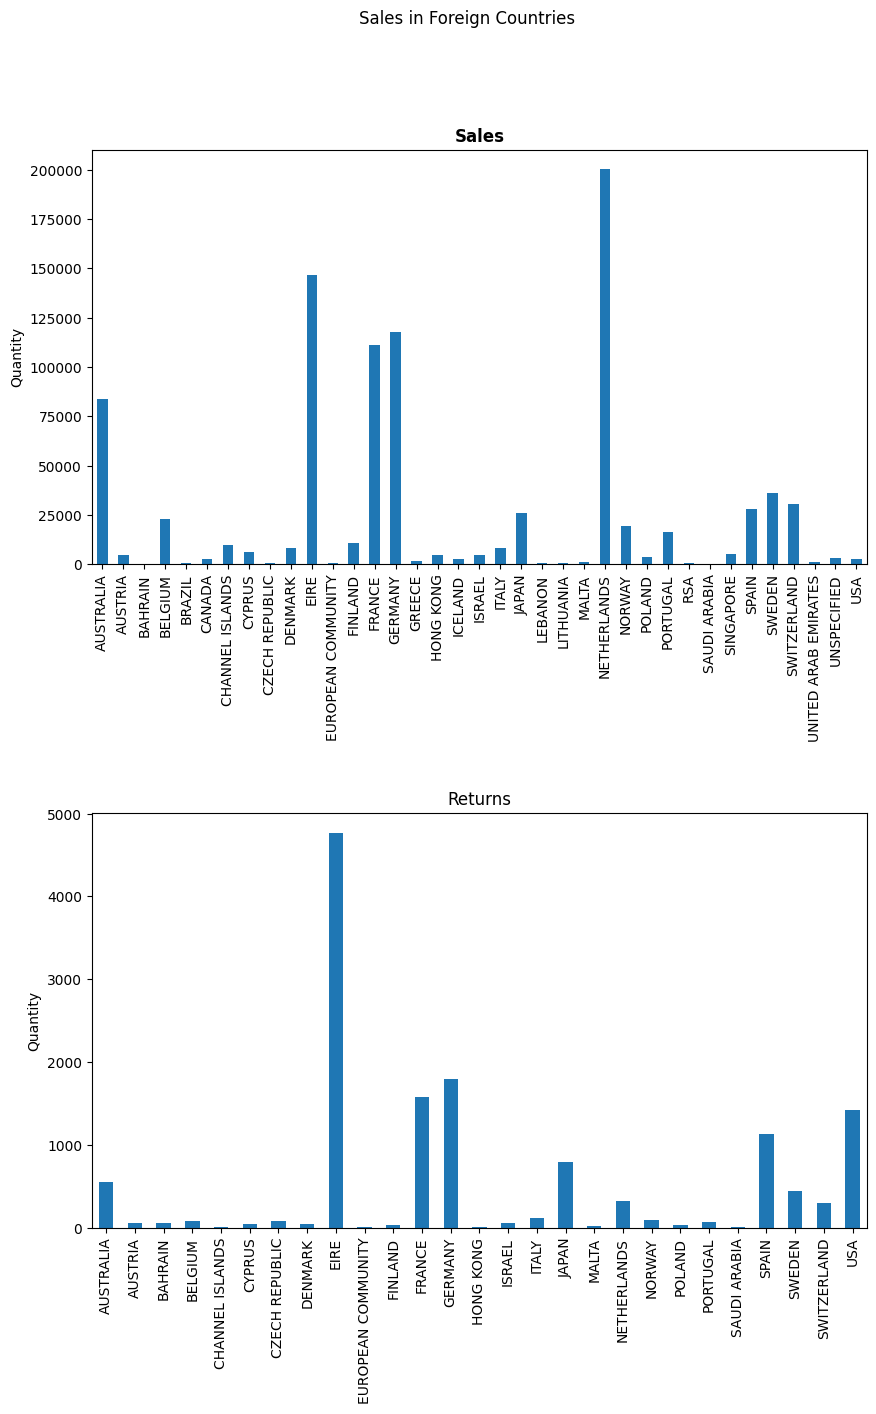

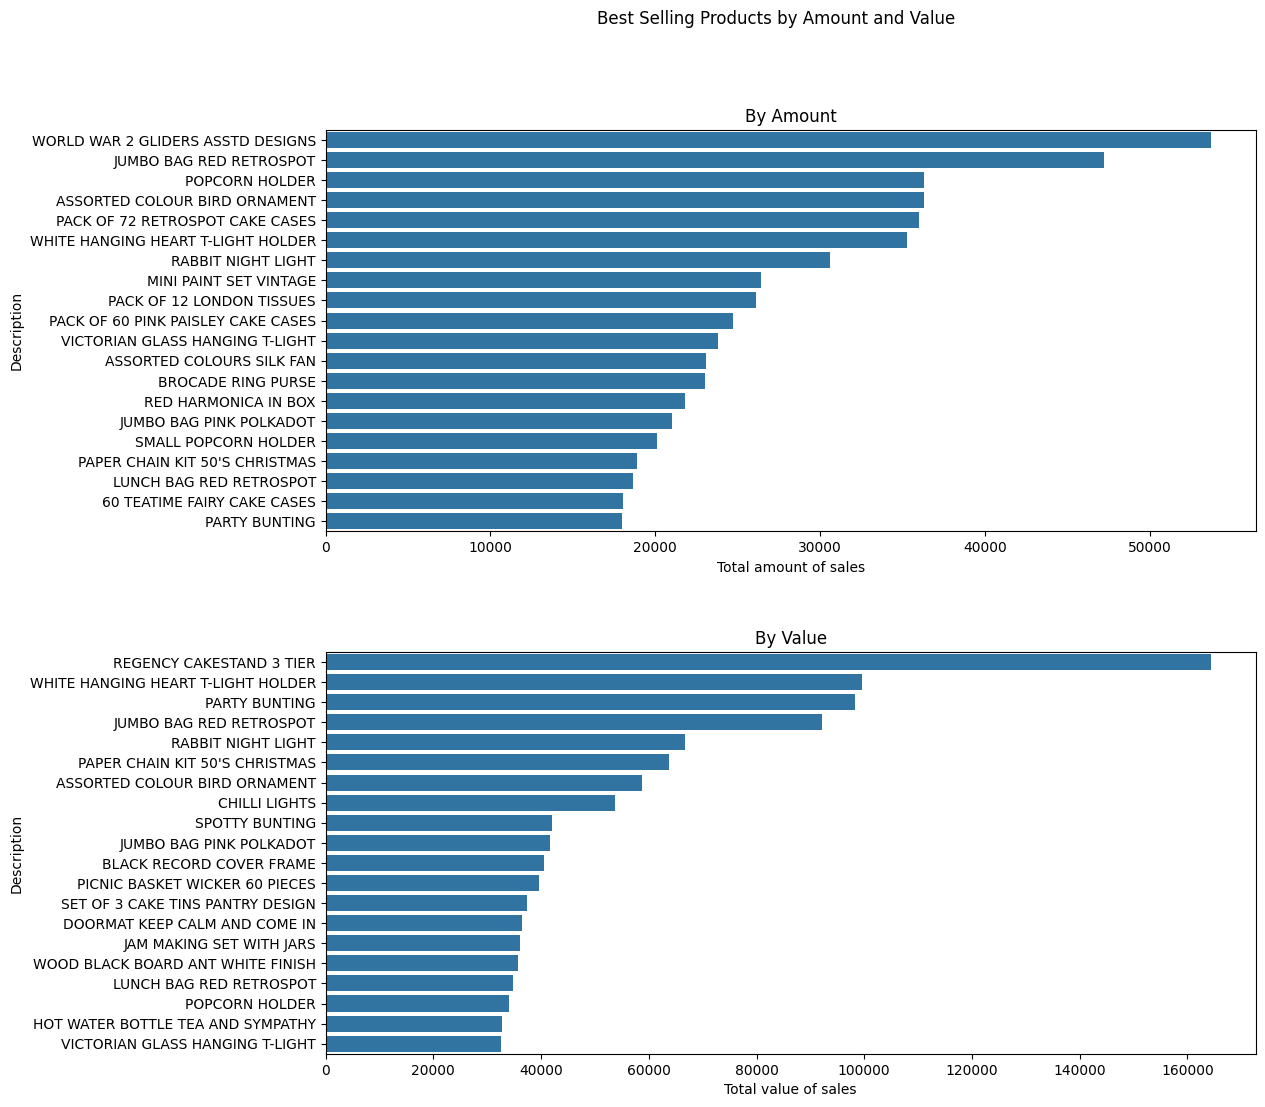

In [40]:
sales_by_country = retail_df[(retail_df.Country != 'UNITED KINGDOM') & (retail_df.Quantity > 0)].groupby('Country')['Quantity'].sum()
returns_by_country = retail_df[(retail_df.Country != 'UNITED KINGDOM') & (retail_df.Quantity < 0)].groupby('Country')['Quantity'].sum().abs()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))
fig.suptitle('Sales in Foreign Countries')

sales_by_country.plot(kind='bar', ax=ax1).set(ylabel='Quantity', xlabel='')
ax1.set_title('Sales', size=12, fontweight='bold')

returns_by_country.plot(kind='bar', ax=ax2).set(ylabel='Quantity', xlabel='')
ax2.set_title('Returns')

plt.subplots_adjust(hspace=0.6)
plt.show()

top_quantity = retail_df.groupby('Description')['Quantity'].sum().nlargest(20)
top_price = retail_df.groupby('Description')['Cost'].sum().nlargest(20)

fig, axs = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle('Best Selling Products by Amount and Value')

sns.barplot(x=top_quantity.values, y=top_quantity.index, ax=axs[0]).set(xlabel='Total amount of sales')
axs[0].set_title('By Amount')

sns.barplot(x=top_price.values, y=top_price.index, ax=axs[1]).set(xlabel='Total value of sales')
axs[1].set_title('By Value')

plt.subplots_adjust(hspace=0.3)
plt.show()

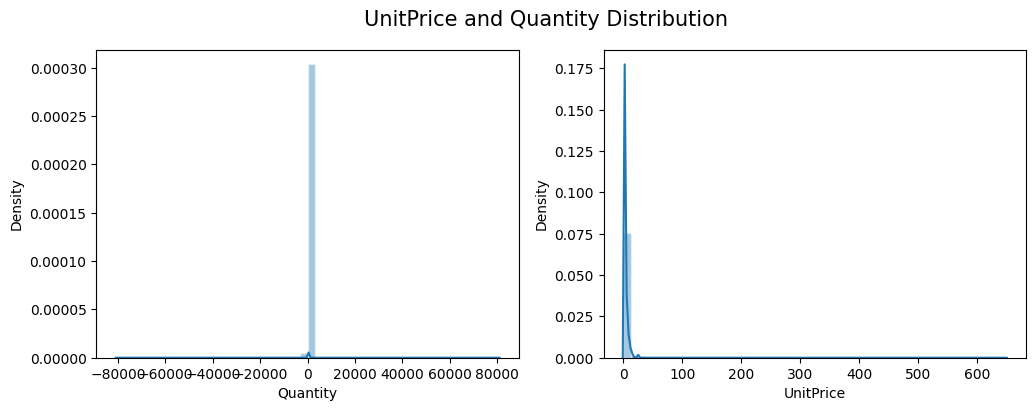

In [41]:
fig , [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
with sns.axes_style('dark'):
    sns.distplot(retail_df['Quantity'], ax=ax1)
    sns.distplot(retail_df['UnitPrice'], ax=ax2)
fig.suptitle('UnitPrice and Quantity Distribution', fontsize = 15)
plt.show()

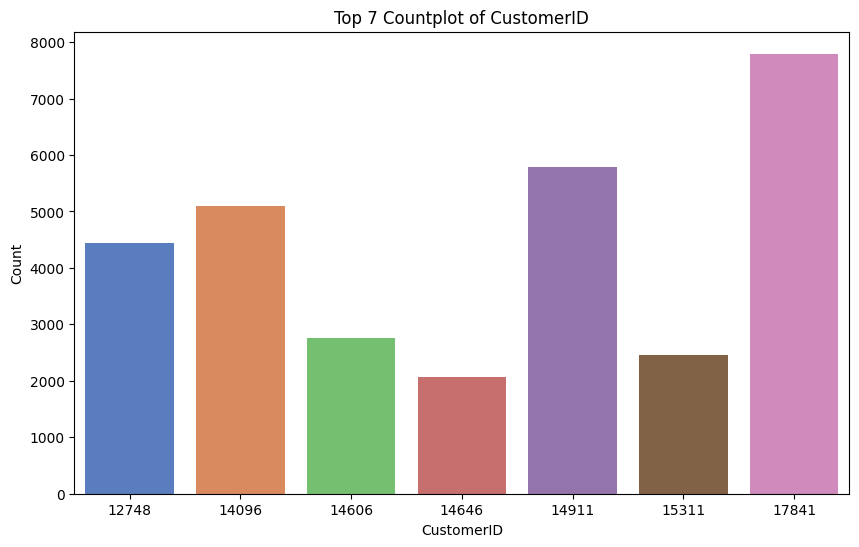

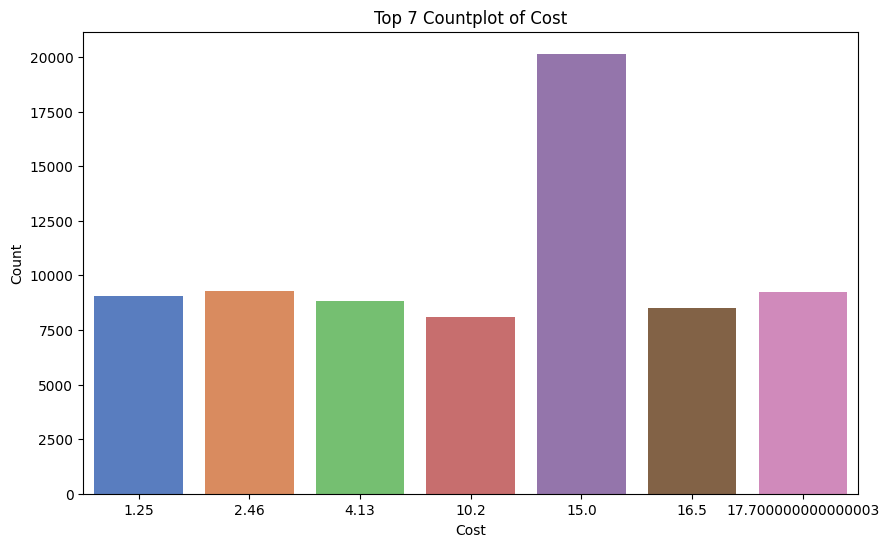

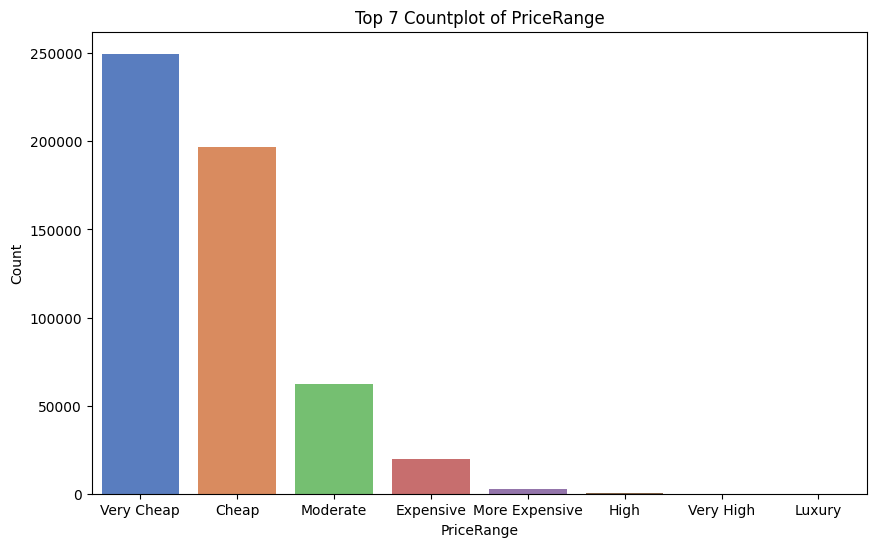

In [42]:
def plot_countplot(data, column, top_n=7):
    top_values = data[column].value_counts().head(top_n)
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data[data[column].isin(top_values.index)], x=column, palette='muted')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Top {top_n} Countplot of {column}')
    plt.show()

plot_countplot(retail_df, 'CustomerID')

plot_countplot(retail_df, 'Cost')

plot_countplot(retail_df, 'PriceRange')

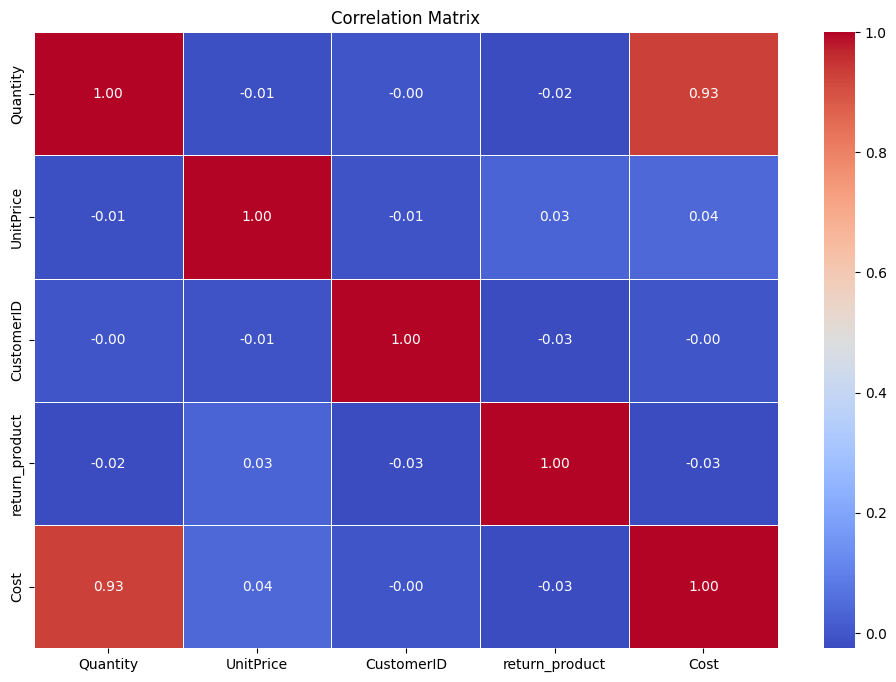

In [43]:
numeric_cols = retail_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = retail_df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

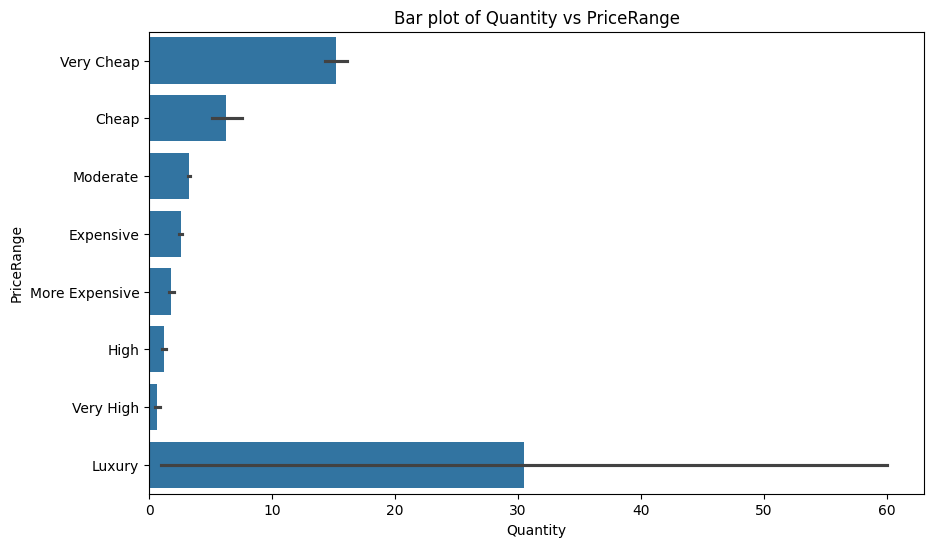

In [44]:
def plot_barplot(data, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=x_col, y=y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Bar plot of {x_col} vs {y_col}')
    plt.show()

plot_barplot(retail_df, 'Quantity', 'PriceRange')

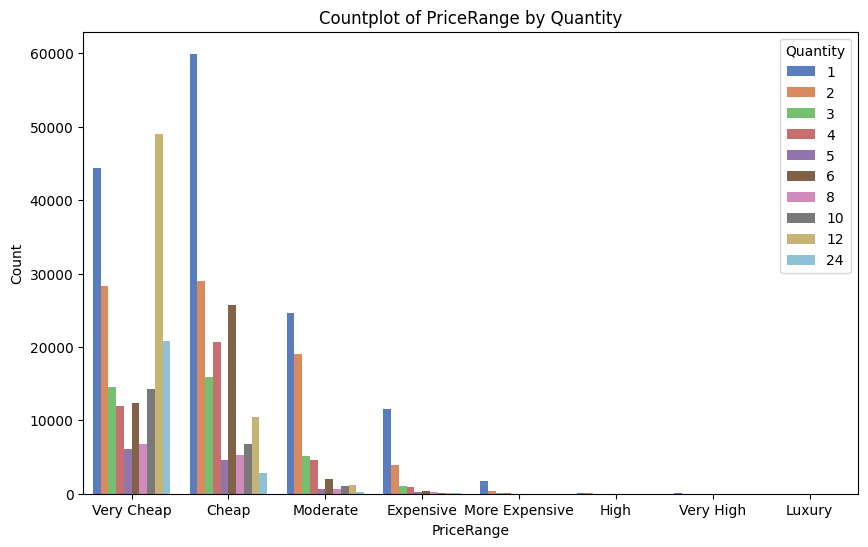

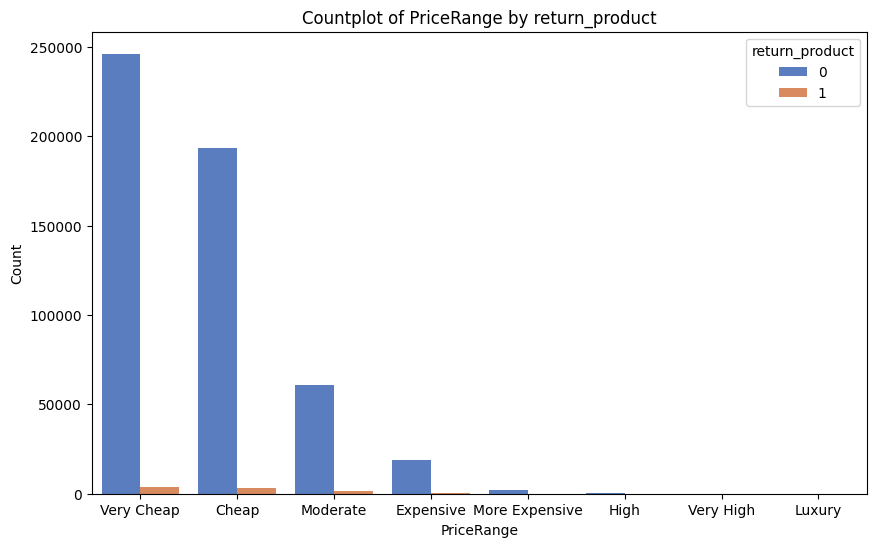

In [45]:
def plot_countplot(data, x_col, y_col, top_n=None):
    plt.figure(figsize=(10, 6))
    
    if top_n:
        top_values = data[y_col].value_counts().head(top_n).index
        data = data[data[y_col].isin(top_values)]
    
    sns.countplot(data=data, x=x_col, hue=y_col, palette='muted')
    
    plt.xlabel(x_col)
    plt.ylabel('Count')
    plt.title(f'Countplot of {x_col} by {y_col}')
    plt.show()

plot_countplot(retail_df, 'PriceRange', 'Quantity', top_n=10)
plot_countplot(retail_df, 'PriceRange', 'return_product', top_n=10)

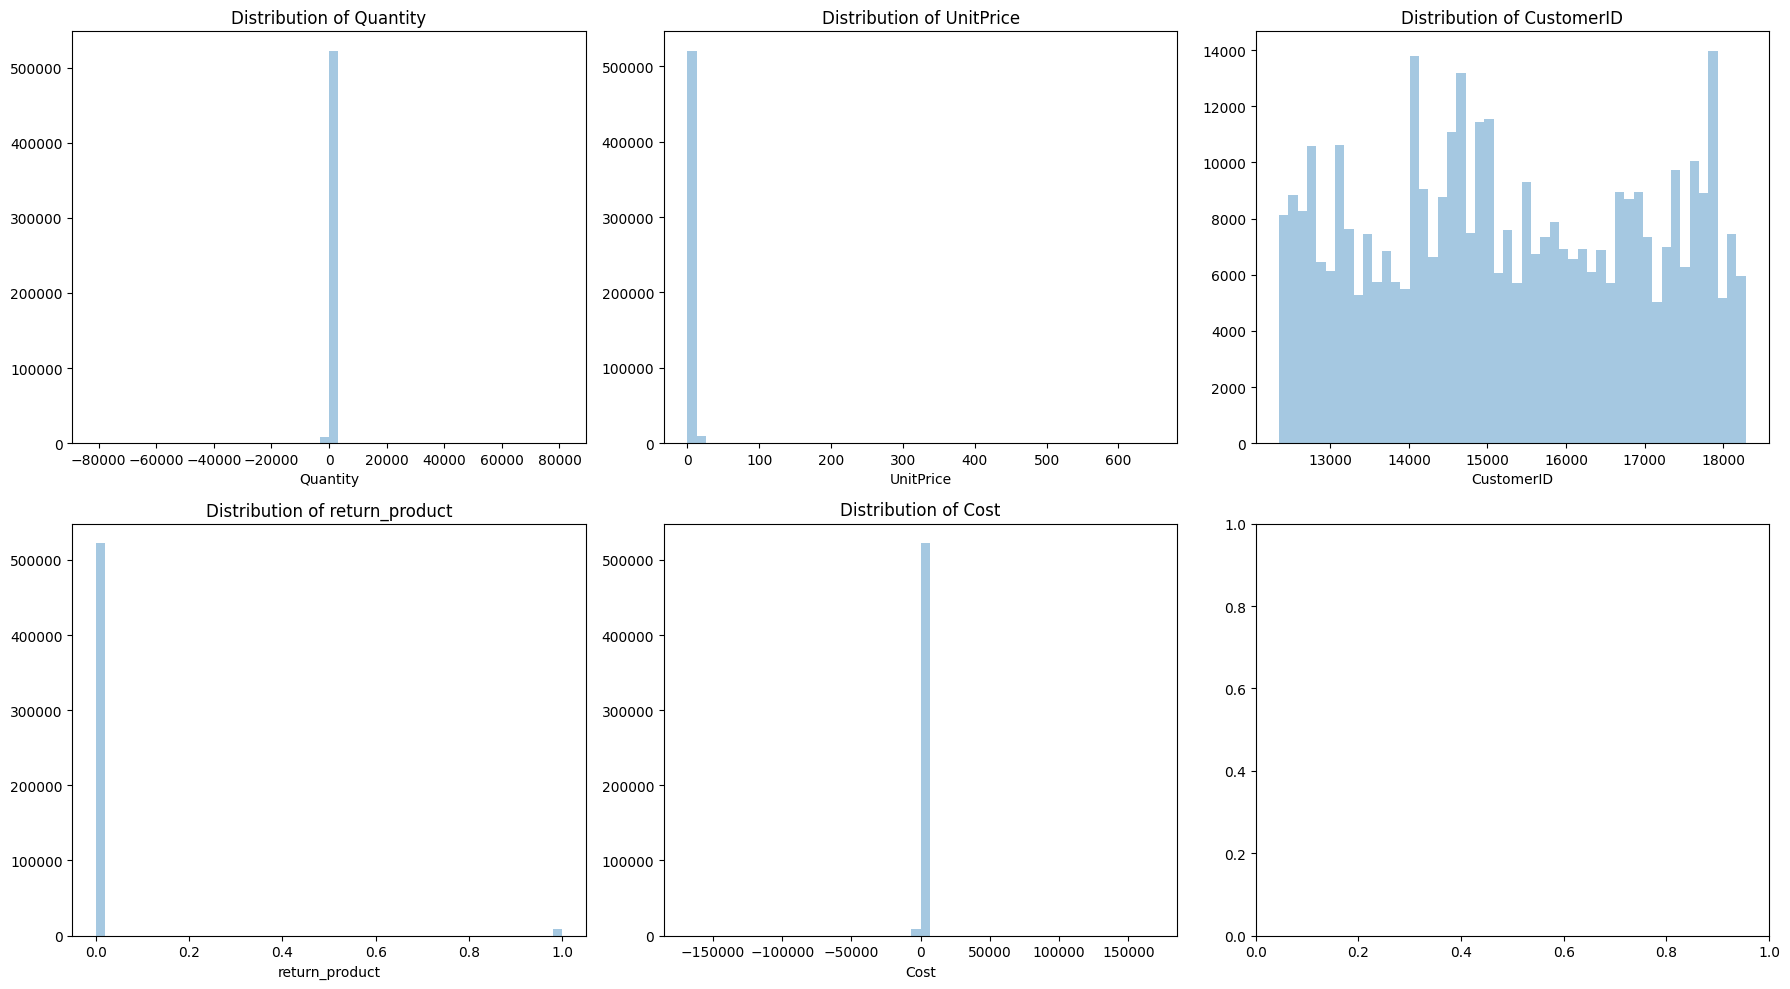

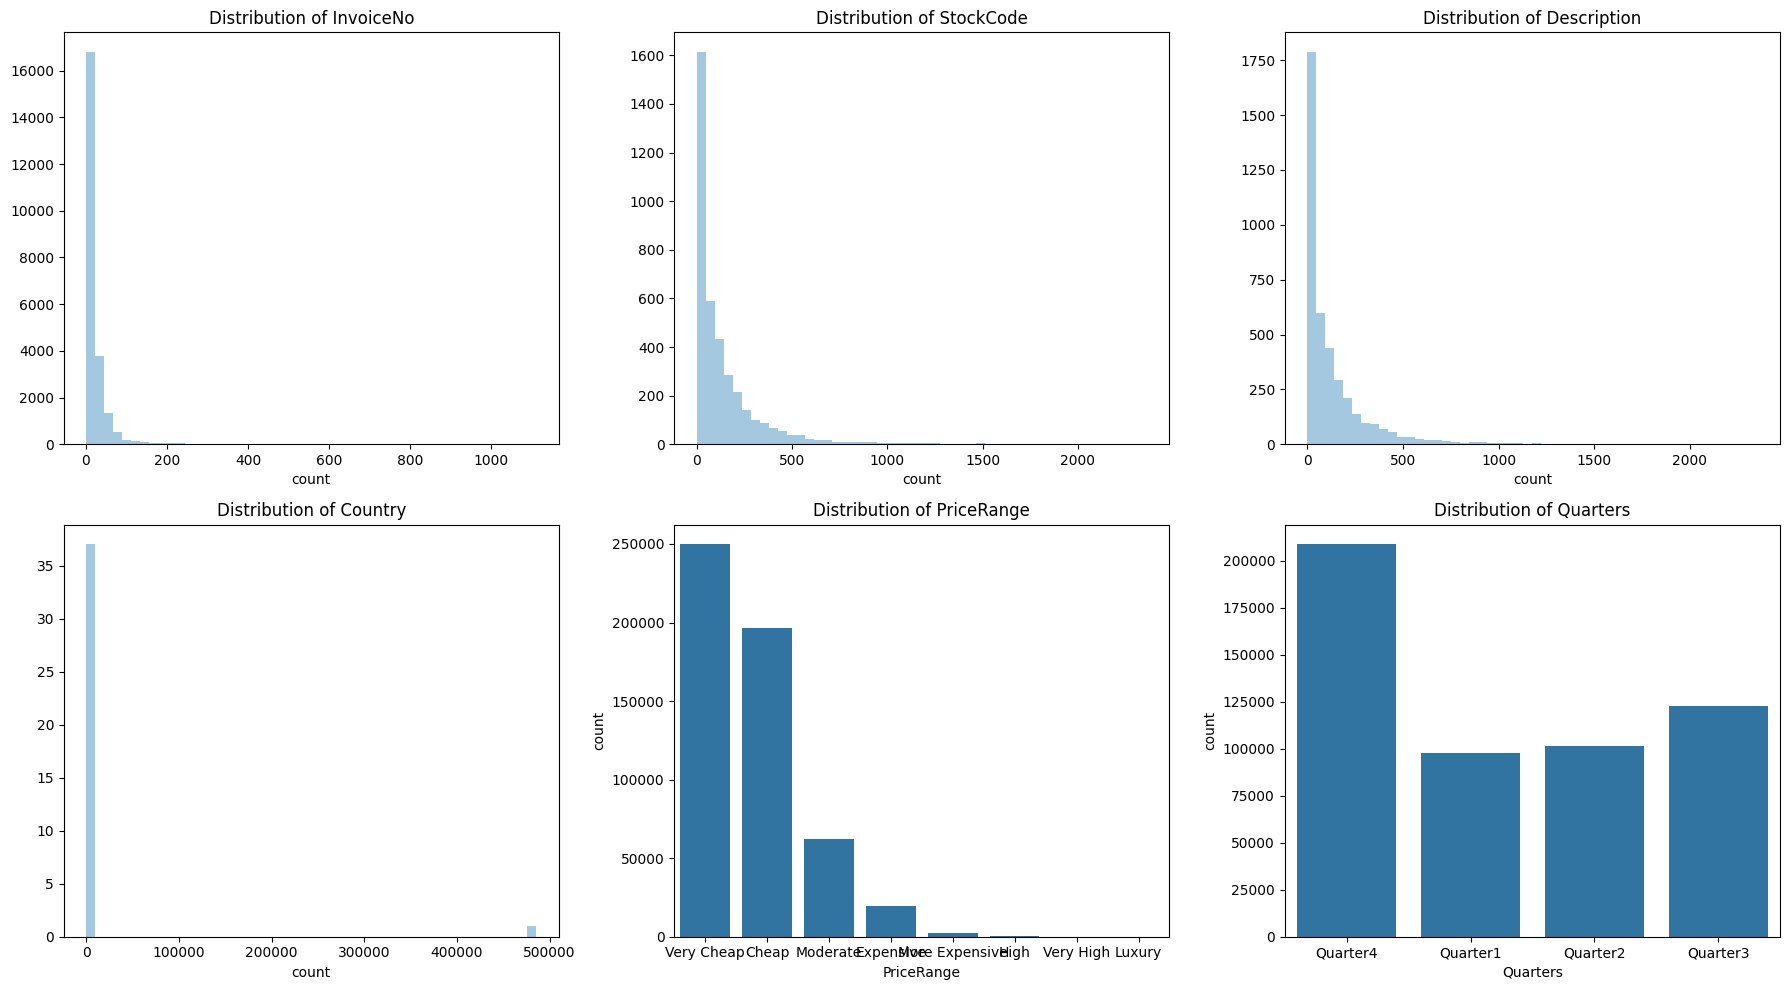

In [46]:
numerical_cols = retail_df.select_dtypes(include=['int64', 'float64']).columns

categorical_cols = retail_df.select_dtypes(include=['category', 'object']).columns

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axs = axs.flatten()
for i, col in enumerate(numerical_cols):
    sns.distplot(retail_df[col], ax=axs[i], kde=False)
    axs[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axs = axs.flatten()
for i, col in enumerate(categorical_cols):
    if retail_df[col].nunique() <= 10:
        sns.countplot(x=col, data=retail_df, ax=axs[i])
    else:
        sns.distplot(retail_df[col].value_counts().sort_index(), ax=axs[i], kde=False)
    axs[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

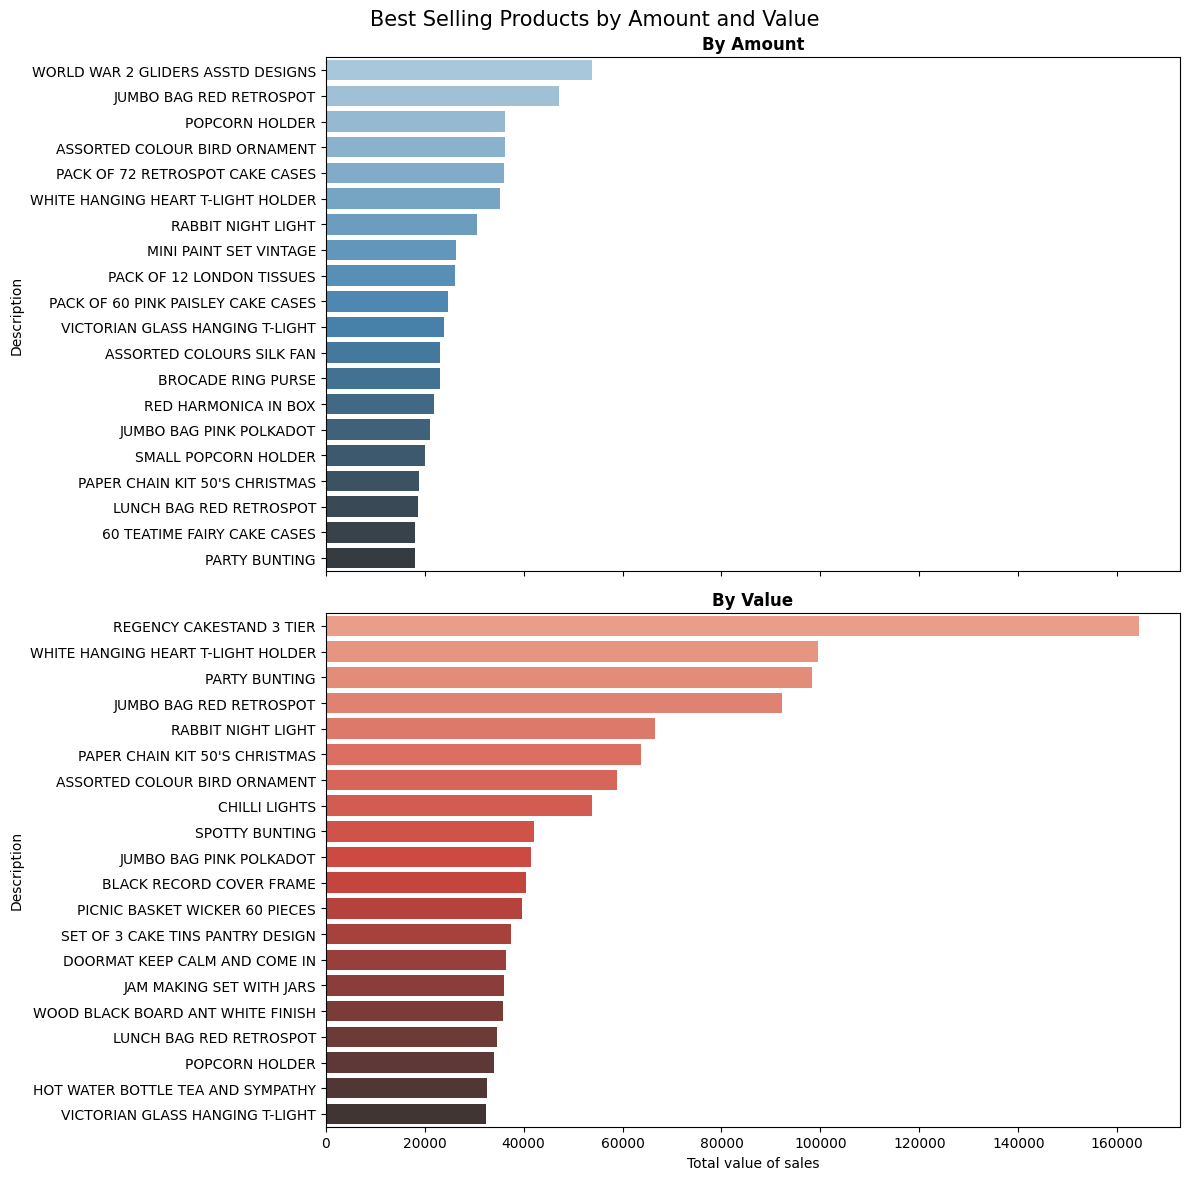

In [47]:
product_quantity = retail_df.groupby('Description')['Quantity'].sum().nlargest(20)
product_price = retail_df.groupby('Description')['Cost'].sum().nlargest(20)

fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
fig.suptitle('Best Selling Products by Amount and Value', fontsize=15)

sns.barplot(x=product_quantity.values, y=product_quantity.index, ax=axs[0], palette='Blues_d')
axs[0].set_title('By Amount', fontsize=12, fontweight='bold')
axs[0].set_xlabel('Total amount of sales')

sns.barplot(x=product_price.values, y=product_price.index, ax=axs[1], palette='Reds_d')
axs[1].set_title('By Value', fontsize=12, fontweight='bold')
axs[1].set_xlabel('Total value of sales')

plt.tight_layout()
plt.show()

In [48]:
null_valued_rows = retail_df[retail_df.isnull().any(axis=1)]

In [49]:
retail_df = retail_df.dropna(how='any')

In [50]:
def map_negative_to_positive(df):
    df['Quantity'] = df['Quantity'].apply(lambda x: abs(x) if x < 0 else x)
    return df

retail_df = map_negative_to_positive(retail_df)

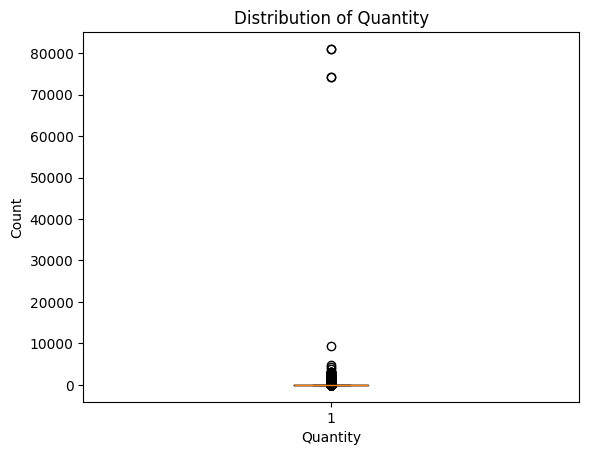

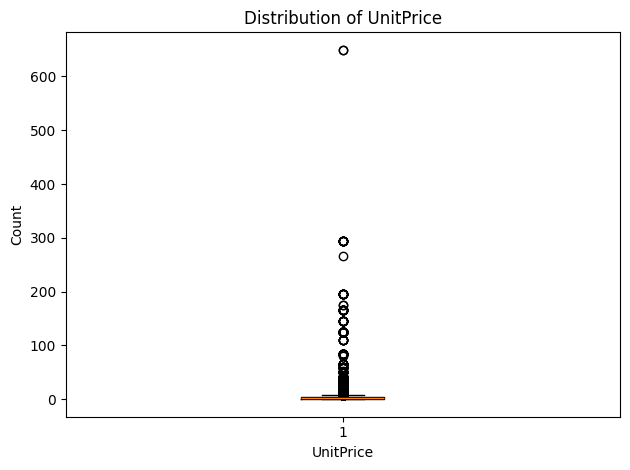

In [51]:
plt.boxplot(retail_df['Quantity'])
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Distribution of Quantity')
plt.show()

plt.boxplot(retail_df['UnitPrice'])
plt.xlabel('UnitPrice')
plt.ylabel('Count')
plt.title('Distribution of UnitPrice')

plt.tight_layout()
plt.show()

In [52]:
def identify_outliers(data_column, threshold=3):
    """
    This function identifies potential outliers in a given DataFrame column using z-scores.

    Args:
        data_column (pandas.Series): The DataFrame column to analyze.
        threshold (float): The threshold value for z-score. Data points with z-score higher than
                           this threshold will be considered outliers. Default is 3.

    Returns:
        int: The number of potential outliers in the column.
    """
    
    z_scores = (data_column - data_column.mean()) / data_column.std()
    
    outliers = z_scores.abs() > threshold
    
    number_of_outliers = outliers.sum()
    
    print(f"Number of potential outliers in '{data_column.name}': {number_of_outliers}")
    
    return number_of_outliers

In [53]:
quantity_outliers = identify_outliers(retail_df['Quantity'])
unitprice_outliers = identify_outliers(retail_df['UnitPrice'])


Number of potential outliers in 'Quantity': 178
Number of potential outliers in 'UnitPrice': 2292


In [54]:
def outlier_treatment(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    data[column] = data[column].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
    
    return data


retail_df = outlier_treatment(retail_df, 'Quantity')

In [55]:
price_range_encoded = pd.get_dummies(retail_df['PriceRange'], dtype=int)

retail_df = pd.concat([retail_df, price_range_encoded], axis=1)

retail_df.drop('PriceRange', axis=1, inplace=True)

In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

features_to_encode = ['StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 
                      'Country', 'Date', 'Month', 'Year', 'Quarters']

for feature in features_to_encode:
    retail_df[feature + '_encoded'] = label_encoder.fit_transform(retail_df[feature])

retail_df.drop(features_to_encode, axis=1, inplace=True)

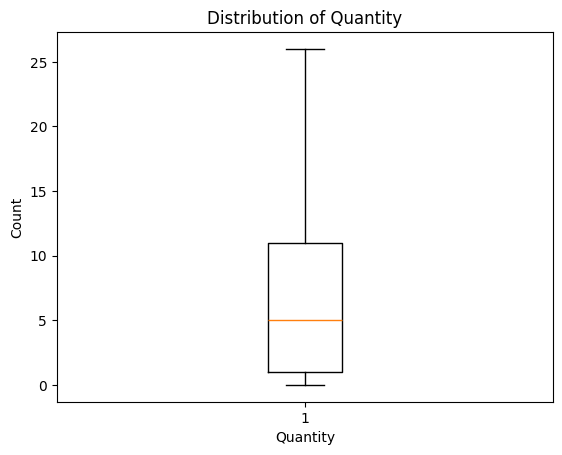

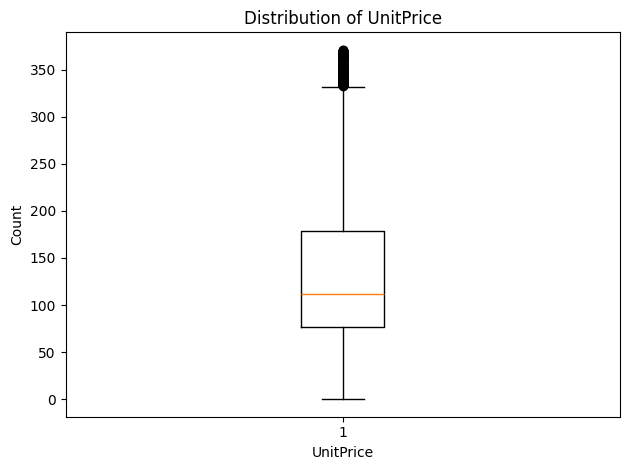

In [57]:
plt.boxplot(retail_df['Quantity_encoded'])
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Distribution of Quantity')
plt.show()

plt.boxplot(retail_df['UnitPrice_encoded'])
plt.xlabel('UnitPrice')
plt.ylabel('Count')
plt.title('Distribution of UnitPrice')

plt.tight_layout()
plt.show()

In [58]:
retail_df.drop(['InvoiceNo'], axis=1, inplace=True)

retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399360 entries, 0 to 541908
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   return_product       399360 non-null  int64  
 1   Cost                 399360 non-null  float64
 2   Very Cheap           399360 non-null  int64  
 3   Cheap                399360 non-null  int64  
 4   Moderate             399360 non-null  int64  
 5   Expensive            399360 non-null  int64  
 6   More Expensive       399360 non-null  int64  
 7   High                 399360 non-null  int64  
 8   Very High            399360 non-null  int64  
 9   Luxury               399360 non-null  int64  
 10  StockCode_encoded    399360 non-null  int64  
 11  Description_encoded  399360 non-null  int64  
 12  Quantity_encoded     399360 non-null  int64  
 13  UnitPrice_encoded    399360 non-null  int64  
 14  CustomerID_encoded   399360 non-null  int64  
 15  Country_encoded      3

In [59]:
X = retail_df.iloc[:, :-1]
y = retail_df["Cost"]

X.shape

(399360, 19)

In [60]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

X = standard_scaler.fit_transform(X)

In [61]:
from sklearn.cross_decomposition import PLSRegression

n_components = 10

pls = PLSRegression(n_components=n_components)

pls.fit(X, y)

X = pls.transform(X)

In [62]:
np.random.seed(12)

indices = np.random.permutation(X.shape[0])
training_idx, test_idx = indices[:int(0.8 * X.shape[0])], indices[int(0.8 * X.shape[0]):]
X_train, X_test = X[training_idx], X[test_idx]
y_train = y.iloc[training_idx]
y_test = y.iloc[test_idx]

In [63]:
class Node:
    def __init__(self, info, left=None, right=None):
        self.info = info
        self.left = left
        self.right = right

def nohtml(s):
    s = s.node().replace('&nbsp;', ' ')
    s = s.replace('<br>', '')
    return s

In [64]:
class DecisionTreeRegressor:
    def __init__(self, min_samples_split=2, min_samples_leaf=1, max_depth=3):
        self.root = None
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth

    def build_tree(self, X, Y, cur_depth=0):
        best_split = {}
        if X.shape[0] >= self.min_samples_split and cur_depth <= self.max_depth:
            best_split = self.get_best_split(X, Y)
            left_index = X[:, best_split["feature_index"]] <= best_split["threshold"]
            right_index = X[:, best_split["feature_index"]] > best_split["threshold"]
            X_left, Y_left = X[left_index], Y[left_index]
            X_right, Y_right = X[right_index], Y[right_index]
            left_subtree = self.build_tree(X_left, Y_left, cur_depth+1)
            right_subtree = self.build_tree(X_right, Y_right, cur_depth+1)
            return Node(best_split, left_subtree, right_subtree)

        best_split["values"] = Y
        return Node(best_split)

    def get_best_split(self, X, Y):
        best_split = {"rss": float('inf')}
        for feature_index in range(X.shape[1]):
            indices = np.argsort(X[:, feature_index])
            X_sort, Y_sort = X[indices, feature_index], Y[indices]
            left_sumsq, left_sum = 0, 0
            right_sumsq, right_sum = np.sum(Y_sort**2), np.sum(Y_sort)
            N_L = 0
            N_R = N_t = len(Y_sort)
            for i in range(N_t - 1):
                left_sumsq, left_sum = left_sumsq + Y_sort[i]**2, left_sum + Y_sort[i]
                right_sumsq, right_sum = right_sumsq - Y_sort[i]**2, right_sum - Y_sort[i]
                N_L, N_R = N_L + 1, N_R - 1
                if N_L >= self.min_samples_leaf and N_R >= self.min_samples_leaf:
                    rss = (left_sumsq - left_sum**2 / N_L) + (right_sumsq - right_sum**2 / N_R)
                    if rss < best_split["rss"]:
                        best_split["rss"] = rss
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = X_sort[i]
        return best_split

    def fit(self, X, Y):
        self.N = len(Y)
        self.root = self.build_tree(X, Y)
        return self

    def predict(self, X):
        predictions = [self.make_prediction(x, self.root)[0] for x in X]
        return predictions

    def make_prediction(self, x, tree, i=0):
        if "values" in tree.info:
            return (tree.info["values"].mean(), i)
        feature_val = x[tree.info["feature_index"]]
        if feature_val <= tree.info["threshold"]:
            return self.make_prediction(x, tree.left, 2*i+1)
        else:
            return self.make_prediction(x, tree.right, 2*i+2)

In [65]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_features = X.shape[1]
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth=0):
        if (self.max_depth is not None and depth >= self.max_depth) or len(np.unique(y)) == 1:
            return {'value': np.mean(y)}

        best_feature, best_threshold = self._find_best_split(X, y)

        left_idxs = X[:, best_feature] < best_threshold
        X_left, y_left = X[left_idxs], y[left_idxs]
        X_right, y_right = X[~left_idxs], y[~left_idxs]

        left_subtree = self._build_tree(X_left, y_left, depth + 1)
        right_subtree = self._build_tree(X_right, y_right, depth + 1)

        return {'feature_idx': best_feature,
                'threshold': best_threshold,
                'left': left_subtree,
                'right': right_subtree}

    def _find_best_split(self, X, y):
        best_feature, best_threshold, best_variance = None, None, float('inf')

        for feature_idx in range(self.n_features):
            min_value, max_value = np.min(X[:, feature_idx]), np.max(X[:, feature_idx])
            thresholds = np.random.uniform(low=min_value, high=max_value, size=100)

            for threshold in thresholds:
                left_idxs = X[:, feature_idx] < threshold
                var_left = np.var(y[left_idxs])
                var_right = np.var(y[~left_idxs])
                variance = var_left + var_right

                if variance < best_variance:
                    best_feature, best_threshold, best_variance = feature_idx, threshold, variance

        return best_feature, best_threshold

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self._predict_tree(x, self.tree))
        return np.array(predictions)

    def _predict_tree(self, x, tree):
        if 'value' in tree:
            return tree['value']

        feature_val = x[tree['feature_idx']]
        branch = tree['left'] if feature_val < tree['threshold'] else tree['right']
        return self._predict_tree(x, branch)

In [66]:
class XGBRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, gamma=0, reg_lambda=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.gamma = gamma
        self.reg_lambda = reg_lambda
        self.trees = []
        self.init_predictions = None

    def fit(self, X, y):

        self.init_predictions = np.mean(y)

        for _ in range(self.n_estimators):
            pseudo_residuals = y - self.init_predictions

            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, pseudo_residuals)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        self.init_predictions = self.init_predictions.reshape(-1, 1)
        return np.mean(predictions, axis=0)

In [67]:
n_estimators = 125
max_depth = 4
learning_rate = 0.175
gamma=0
reg_lambda=1

regressor = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, gamma=0, reg_lambda=1)

regressor.fit(X_train, y_train.values)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared score:", r2)
print("Mean absolute error:", mae)

In [ ]:
def plot_performance_metrics(y_true, y_pred):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    sns.scatterplot(x=y_true, y=y_pred, color='blue', label='Actual Values')
    sns.scatterplot(x=y_true, y=y_pred, color='red', alpha=0.3, label='Predicted Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs. Predicted Values')
    plt.legend()

    residuals = y_true - y_pred

    plt.subplot(1, 3, 2)
    sns.scatterplot(x=y_pred, y=residuals, color='blue', label='Predicted Values')
    sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.3, label='Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Predicted Values vs. Residuals')
    plt.legend()

    plt.subplot(1, 3, 3)
    sns.histplot(residuals, kde=True, color='green', label='Residuals')
    plt.xlabel('Residuals')
    plt.title('Residual Distribution')

    plt.tight_layout()
    plt.show()

plot_performance_metrics(y_test, y_pred)

In [ ]:
plt.scatter(y_test, y_pred, c='blue', label='Actual Values')
plt.scatter(y_test, y_pred, c='red', alpha=0.3, label='Predicted Values')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")

plt.legend()

plt.show()


In [ ]:
print("Mean squared error:", mse)
print("R-squared:", r2)
print("Mean absolute error:", mae)

In [ ]:
class LassoRegression:
    def __init__(self, learning_rate=0.01, lambda_=0.01, n_iterations=5000):
        self.learning_rate = learning_rate
        self.lambda_ = lambda_
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            y_pred = self.predict(X)

            d_weights = -(2 / len(X)) * (X.T @ (y - y_pred)) + self.lambda_ * np.sign(self.weights)
            d_bias = -(2 / len(X)) * np.sum(y - y_pred)

            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        return X @ self.weights + self.bias

class RidgeRegression:
    def __init__(self, learning_rate=0.01, lambda_=1, n_iterations=5000):
        self.learning_rate = learning_rate
        self.lambda_ = lambda_
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            y_pred = self.predict(X)

            d_weights = -(2 / len(X)) * (X.T @ (y - y_pred)) + 2 * self.lambda_ * self.weights
            d_bias = -(2 / len(X)) * np.sum(y - y_pred)

            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        return X @ self.weights + self.bias

In [ ]:
class EnsembleRegressor:
    def __init__(self, lasso_params=None, ridge_params=None):
        self.lasso_params = lasso_params
        self.ridge_params = ridge_params
        self.lasso_model = None
        self.ridge_model = None

    def fit(self, X, y):
        self.lasso_model = LassoRegression(**self.lasso_params)
        self.ridge_model = RidgeRegression(**self.ridge_params)
        self.lasso_model.fit(X, y)
        self.ridge_model.fit(X, y)

    def predict(self, X):
        y_pred_lasso = self.lasso_model.predict(X)
        y_pred_ridge = self.ridge_model.predict(X)
        return (y_pred_lasso + y_pred_ridge) / 2

In [ ]:
lasso_regressor = LassoRegression(learning_rate=0.1, lambda_=8.5, n_iterations=10000)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Mean squared error:", mse_lasso)
print("R-squared score:", r2_lasso)
print("Mean absolute error:", mae_lasso)

In [ ]:
ridge_regressor = RidgeRegression(learning_rate=0.1, lambda_=.7, n_iterations=10000)
ridge_regressor.fit(X_train, y_train)

y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("Mean squared error:", mse_ridge)
print("R-squared score:", r2_ridge)
print("Mean absolute error:", mae_ridge)

In [ ]:
n_estimators = 150
max_depth = 3
learning_rate = 0.15
lasso_params = {'learning_rate': 0.1, 'lambda_': .1, 'n_iterations': 500}
ridge_params = {'learning_rate': 0.1, 'lambda_': .1, 'n_iterations': 500}

ensemble_regressor = EnsembleRegressor(lasso_params=lasso_params, ridge_params=ridge_params)

ensemble_regressor.fit(X_train, y_train)

In [ ]:
y_pred_ensemble = ensemble_regressor.predict(X_test)

ensemble_mse = mean_squared_error(y_test, y_pred_ensemble)
ensemble_r2 = r2_score(y_test, y_pred_ensemble)
ensemble_mae = mean_absolute_error(y_test, y_pred_ensemble)
print("Mean squared error:", ensemble_mse)
print("R-squared score:", ensemble_r2)
print("Mean absolute error:", ensemble_mae)

In [ ]:
def plot_performance_metrics(y_true, y_pred_lasso, y_pred_ridge, y_pred_ensemble):
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    sns.scatterplot(x=y_true, y=y_pred_lasso, color='blue', label='Actual Values')
    sns.scatterplot(x=y_true, y=y_pred_lasso, color='red', alpha=0.3, label='Predicted Values (Lasso)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs. Predicted Values (Lasso)')
    plt.legend()

    plt.subplot(1, 3, 2)
    sns.scatterplot(x=y_true, y=y_pred_ridge, color='blue', label='Actual Values')
    sns.scatterplot(x=y_true, y=y_pred_ridge, color='green', alpha=0.3, label='Predicted Values (Ridge)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs. Predicted Values (Ridge)')
    plt.legend()

    plt.subplot(1, 3, 3)
    sns.scatterplot(x=y_true, y=y_pred_ensemble, color='blue', label='Actual Values')
    sns.scatterplot(x=y_true, y=y_pred_ensemble, color='purple', alpha=0.3, label='Predicted Values (Ensemble)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs. Predicted Values (Ensemble)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

r2_ensemble = r2_score(y_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)

print("Lasso Regression:")
print("R-squared:", r2_lasso)
print("Mean Absolute Error:", mae_lasso)
print()

print("Ridge Regression:")
print("R-squared:", r2_ridge)
print("Mean Absolute Error:", mae_ridge)
print()

print("Ensemble Model:")
print("R-squared:", r2_ensemble)
print("Mean Absolute Error:", mae_ensemble)

In [ ]:
plot_performance_metrics(y_test, y_pred_lasso, y_pred_ridge, y_pred)